In [1]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile
from shapely.geometry import shape, mapping, Point, Polygon
from zipfile import ZipFile
from io import BytesIO
import descartes
import re
%matplotlib inline

# Honda Driving Data EDA

In [2]:
metadata = pd.read_csv('Data/start_stop data.csv')
trip = pd.read_csv('Data/trip_data.csv')

In [3]:
trip.head()

Device  Trip     Time  LocalTimeMS  Latitude   Longitude    \
0    2218   432  1391000     81787741  34.079705   -84.641423   
1    2218   432  1390950     81787241  34.079679   -84.641531   
2    2218   432  1390900     81786741  34.079656   -84.641641   
3    2218   432  1390850     81786241  34.079628   -84.641752   
4    2218   432  1390800     81785741  34.079602   -84.641864   

   Elevation            Heading               GpsSpeed               \
0           255.669998             74.260002              20.652681   
1           255.669998             75.190002              21.088972   
2           255.669998             74.370003              21.495972   
3           255.770004             74.389999              21.132139   
4           255.869995             74.480003              22.103390   

   GpsFixType      ...       SteerAngle  TurnSignal  Headlamp  Wiper  \
0         2.0      ...              0.0         0.0         0      0   
1         2.0      ...              0.0         0.0         0      0   
2         2.0      ...              0.0         0.0         0      0   
3         2.0      ...              0.0         0.0         0      0   
4         2.0      ...              0.0         0.0         0      0   

   TransState  StabilityControlStatus  ABSStatus  TracControlStatus  \
0           2                       0          0                  0   
1           2                       0          0                  0   
2           2                       0          0                  0   
3           2                       0          0                  0   
4           2                       0          0                  0   

   ClosestIntersectId      Distance  
0                   0  342896.68750  
1                   0  342886.34375  
2                   0  342875.81250  
3                   0  342865.06250  
4                   0  342854.50000  

[5 rows x 28 columns]

In [4]:
tripArr = trip[['Latitude ', 'Longitude  ']].values

In [20]:
m = folium.Map([39.9999, -82.9988], 
               zoom_start=11)
m.add_child(plugins.HeatMap(tripArr, radius=15))
m

# Point of Interest EDA

In [21]:
# Points of Interest file - includes all popular areas in Columbus, OH
# Source: http://opendata.columbus.gov/datasets/86458e5d8a264dff9204518e109c0f93_10?geometry=-83.926%2C39.846%2C-82.168%2C40.214&page=7
POI_df = pd.read_csv('Data/Points_of_Interest.csv')

In [22]:
POI_df.head()

X          Y  OBJECTID  COLS_KEY                    LSN  \
0 -83.112629  40.006321   5787325  626098.0     3750 ZANE TRACE DR   
1 -83.059869  40.052299   5787326  586262.0  1520 OLD HENDERSON RD   
2 -82.978142  40.061762   5787327  811713.0           4661 KARL RD   
3 -82.994076  39.952413   5787328  233764.0        500 S 4TH ST  1   
4 -83.012750  39.956807   5787329  589438.0        185 MCDOWELL ST   

                                      POI_NAME                POI_TYPE  \
0                                   Pet Brands  Industrial - Warehouse   
1                    The Breathing Association         Medical - Other   
2  Fresenius Kidney Care Central Ohio Dialysis         Medical - Other   
3              Advanced Auto Insurance Network      Office - Corporate   
4                         All American Welding       Retail - Services   

  POI_SOURCE PRIMARY ALT_GEOM     PHONE_NUM  \
0        NaN     Yes      Yes           NaN   
1        NaN      No      Yes  614-457-4570   
2        NaN     Yes      Yes    6148400012   
3        NaN     Yes      Yes           NaN   
4        NaN     Yes      Yes           NaN   

                                 GLOBALID  \
0  {2D626609-391A-4BB2-B33E-DEF58FD576EE}   
1  {2397A8D6-753F-4D01-A40A-E1B5E940CD92}   
2  {24AF2DF8-3221-43B5-A611-7768F1EB201E}   
3  {61040209-31C6-4035-B835-80DAE70BB4BC}   
4  {2B36E5A7-8F4B-464D-9D49-8E053AFB321C}   

                                WEBSITE OB_GYN PEDIATRICS PRIMARY_CARE  
0                                   NaN    NaN        NaN          NaN  
1  http://www.breathingassociation.org/    NaN        NaN          NaN  
2                                   NaN    NaN        NaN          NaN  
3                                   NaN    NaN        NaN          NaN  
4                                   NaN    NaN        NaN          NaN

In [23]:
#drop irrelevant columns
POI_df = POI_df.drop(['POI_SOURCE', 'WEBSITE', 'OB_GYN', 'PEDIATRICS', 'PRIMARY_CARE'], axis=1)
POI_df.head()

X          Y  OBJECTID  COLS_KEY                    LSN  \
0 -83.112629  40.006321   5787325  626098.0     3750 ZANE TRACE DR   
1 -83.059869  40.052299   5787326  586262.0  1520 OLD HENDERSON RD   
2 -82.978142  40.061762   5787327  811713.0           4661 KARL RD   
3 -82.994076  39.952413   5787328  233764.0        500 S 4TH ST  1   
4 -83.012750  39.956807   5787329  589438.0        185 MCDOWELL ST   

                                      POI_NAME                POI_TYPE  \
0                                   Pet Brands  Industrial - Warehouse   
1                    The Breathing Association         Medical - Other   
2  Fresenius Kidney Care Central Ohio Dialysis         Medical - Other   
3              Advanced Auto Insurance Network      Office - Corporate   
4                         All American Welding       Retail - Services   

  PRIMARY ALT_GEOM     PHONE_NUM                                GLOBALID  
0     Yes      Yes           NaN  {2D626609-391A-4BB2-B33E-DEF58FD576EE}  
1      No      Yes  614-457-4570  {2397A8D6-753F-4D01-A40A-E1B5E940CD92}  
2     Yes      Yes    6148400012  {24AF2DF8-3221-43B5-A611-7768F1EB201E}  
3     Yes      Yes           NaN  {61040209-31C6-4035-B835-80DAE70BB4BC}  
4     Yes      Yes           NaN  {2B36E5A7-8F4B-464D-9D49-8E053AFB321C}

In [24]:
POI_df['POI_TYPE'].unique()

array(['Industrial - Warehouse', 'Medical - Other', 'Office - Corporate',
       'Retail - Services', 'Education - Elementary',
       'Industrial - Water Treatment Plant', 'Office - Non-Profit',
       'Retail - Commercial/Retail', 'Public Places - House of Worship',
       'Retail - Shopping Center-Neighborhood', 'Retail - Gas Station',
       'Retail - Restaurant', 'Retail - Shopping Center-Community',
       'Transportation - Parking Lot/Garage', 'Education - High',
       'Education - College/University', 'Group Quarters - Dormitory',
       "Medical - Women's Health", 'Medical - Physician',
       'Medical - Research/Laboratory', 'Transportation - Bus',
       'Medical - Dental', 'Medical - Veterinary',
       'Emergency Response - Police', 'Transportation - Other',
       'Public Places - Community/Recreation Center',
       'Retail - Specialty Food', 'Education - Other',
       'Retail - Fitness Center', 'Retail - Mixed Use',
       'Public Places - Arena/Stadium',
       'Medi

In [25]:
len(POI_df['POI_TYPE'].unique())

74

In [26]:
X_loc = POI_df['X'] #longitude -> east/west
Y_loc = POI_df['Y'] #latitude -> north/south

In [27]:
len(POI_df) # of points of interest

14619

In [28]:
min(X_loc), max(X_loc)

(-83.20144920895963, -82.53664015486812)

In [29]:
min(Y_loc), max(Y_loc)

(39.72050603807074, 40.38405029613208)

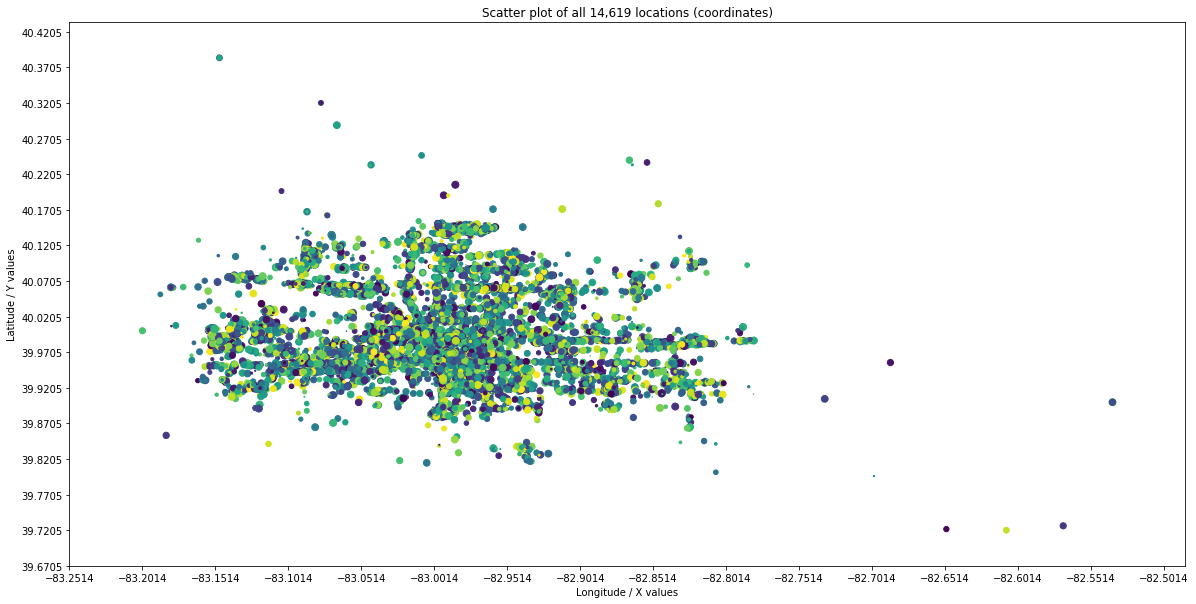

In [30]:
N = len(X_loc)
area = (50 * np.random.rand(N))

plt.figure(figsize=(20,10))
plt.title("Scatter plot of all 14,619 locations (coordinates)")
# plt.axis([-83.25, -82.5, 39.65, 40.45])

xi = np.arange(min(X_loc) - 0.05, max(X_loc) + 0.05, 0.05)
yi = np.arange(min(Y_loc) - 0.05, max(Y_loc) + 0.05, 0.05)

plt.xticks(xi)
plt.yticks(yi)
plt.xlim(min(X_loc) - 0.05, max(X_loc) + 0.05)
plt.ylim(min(Y_loc) - 0.05, max(Y_loc) + 0.05)

plt.xlabel("Longitude / X values")
plt.ylabel("Latitude / Y values")
plt.scatter(X_loc, Y_loc, s=area, c=np.random.rand(N))

# Population Density EDA

In [31]:
census_data = pd.read_excel("Data/Columbus_Population.xlsx").iloc[:,0:2]
geoids = census_data.iloc[:,0]
census_data.head()

GEOID  2010 Total Population
0  390410101003                   2258
1  390410102002                   1002
2  390410102003                   2692
3  390410102004                    927
4  390410105201                    229

In [32]:
# CREDIT TO http://andrewgaidus.com/Reading_Zipped_Shapefiles/, used to parse census data taken from
# .dbf, .prj, .shp, and .shx files

zipFile = ZipFile("Data/ohio_tigerfiles.zip")
filenames = [y for y in sorted(zipFile.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
dbf, prj, shp, shx = [BytesIO(zipFile.read(filename)) for filename in filenames]

reader = shapefile.Reader(shp=shp, shx=shx, dbf=dbf)
attributes, geometry = [], []
field_names = [field[0] for field in reader.fields[1:]]  
for row in reader.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))
    attributes.append(dict(zip(field_names, row.record)))

In [33]:
# Put tigerfiles into GeoDataFrame
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)[["ALAND10", "GEOID10", "geometry"]]
gdf = gdf.rename(index=str, columns={"ALAND10": "Area", "GEOID10": "GEOID"})
gdf.GEOID = gdf.GEOID.astype(int)
gdf = gdf[gdf["GEOID"].isin(geoids)] # Only get data on GEOIDs that match census data above

# Latitude/Longitude ordering is switched, swap it back and add it as the "geometry" column
block_coord_array = []
for _, row in gdf.iterrows():
    row_coord_array = []
    for coord in mapping(row['geometry'])['coordinates'][0]:
        correct_coord = reversed(coord)
        row_coord_array.append(list(correct_coord))
    
    block_coord_array.append(row_coord_array)

In [34]:
# To be used for gettting GEOID data for a given lat/long
gdf_original = gdf.copy(deep=True)

gdf["geometry"] = pd.Series(block_coord_array, index=gdf.index)
gdf.head()

Area         GEOID                                           geometry
307  48342325  391590503011  [[40.243837, -83.400046], [40.243618999999995,...
308  21876645  391590501003  [[40.429511999999995, -83.287651], [40.429269,...
309  13081513  391590502003  [[40.429511999999995, -83.287651], [40.430355,...
310  53573385  391590502002  [[40.351451999999995, -83.35313699999999], [40...
311  36947189  391590502004  [[40.346618, -83.319272], [40.346743, -83.3202...

In [35]:
### For each GEOID in census_data, get polygon description and area of that block
def getMatchingGEOIDData(geoid):
    return gdf[gdf["GEOID"] == int(geoid)][["Area", "geometry"]]

blockRows = geoids.apply(getMatchingGEOIDData) #An array of DF rows

In [36]:
### Combine all block data, add it to census_data
block_df = pd.DataFrame()
for row in blockRows:
    block_df = block_df.append(row, ignore_index=True)
    
ohio_population_data = census_data.join(block_df)

In [37]:
# Now adding county name for each GEOID

county_data = pd.read_excel("Data/Ohio_GEOID_Conversion.xlsx").iloc[:,1:4]

def geoidToCountyLatLong(geoid):
    countyCode = int(geoid / 10000000)
    return county_data[county_data["GEOID"] == countyCode][["NAME"]]

# geoids is only restricted to columbus
countyRows = geoids.apply(geoidToCountyLatLong)
county_df = pd.DataFrame()
for county in countyRows:
    county_df = county_df.append(county, ignore_index=True)
    
ohio_population_data["CountyNames"] = pd.Series(county_df.NAME.values, index=ohio_population_data.index)

In [38]:
ohio_population_data = ohio_population_data.rename(index=str, columns={"Area": "Area (square miles)"})

# Convert square meters to square miles
ohio_population_data["Area (square miles)"] = ohio_population_data["Area (square miles)"] / 2589988
ohio_population_data.head(10)

GEOID  2010 Total Population  Area (square miles)  \
0  390410101003                   2258             0.444847   
1  390410102002                   1002             0.369116   
2  390410102003                   2692             1.485314   
3  390410102004                    927             0.936026   
4  390410105201                    229             2.287126   
5  390410105203                   2244             1.281641   
6  390410105301                   1601             0.315772   
7  390410105302                   1616             0.667656   
8  390410111021                   2485            33.599934   
9  390410111022                   2432            28.536406   

                                            geometry      CountyNames  
0  [[40.303889, -83.082549], [40.303813, -83.0823...  Delaware County  
1  [[40.297744, -83.046934], [40.296802, -83.0467...  Delaware County  
2  [[40.297655999999996, -83.046442], [40.2977, -...  Delaware County  
3  [[40.2826, -83.061833], [40.282747, -83.061826...  Delaware County  
4  [[40.267752, -83.11309299999999], [40.267989, ...  Delaware County  
5  [[40.30179, -83.11734899999999], [40.302429, -...  Delaware County  
6  [[40.281327, -83.069188], [40.280282, -83.0692...  Delaware County  
7  [[40.2929, -83.082515], [40.293167, -83.081262...  Delaware County  
8  [[40.339214999999996, -82.955354], [40.339469,...  Delaware County  
9  [[40.280944, -82.830818], [40.280507, -82.8310...  Delaware County

In [39]:
# Columbus is in Franklin County
grouped_population_data = ohio_population_data.groupby(["CountyNames"])
franklin_county_data = grouped_population_data.get_group("Franklin County")
franklin_county_data.head()

GEOID  2010 Total Population  Area (square miles)  \
181  390490001101                   1080             0.252038   
182  390490001102                    857             0.176053   
183  390490001103                    648             0.106641   
184  390490001104                    759             0.222644   
185  390490001201                    789             0.499668   

                                              geometry      CountyNames  
181  [[40.061105, -83.008573], [40.061293, -83.0085...  Franklin County  
182  [[40.055952, -83.00909], [40.055008, -83.00920...  Franklin County  
183  [[40.062048999999995, -83.00968], [40.062025, ...  Franklin County  
184  [[40.055063, -83.028915], [40.055254, -83.0287...  Franklin County  
185  [[40.045877999999995, -83.032333], [40.045898,...  Franklin County

In [40]:
# Calculate min and max values for density and area of blocks in franklin county
density_array = franklin_county_data["2010 Total Population"] / franklin_county_data["Area (square miles)"]

fc_max_density = max(density_array)
fc_min_density = min(density_array)
fc_max_area = franklin_county_data.max()["Area (square miles)"]
fc_min_area = franklin_county_data.min()["Area (square miles)"]

def areaToMapArea(area):
    # OldRange = (OldMax - OldMin)  
    oldRange = fc_max_area - fc_min_area
    
    # NewRange = (NewMax - NewMin)
    newRange = 1500
    
    # NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return (((area - franklin_county_data.min()["Area (square miles)"]) * newRange) / oldRange) + 100

In [45]:
colors = matplotlib.colors.Normalize(vmin=fc_min_density, vmax=fc_max_density, clip=True)
mapper = cm.ScalarMappable(norm=colors, cmap=cm.cool)

map_of_ohio = folium.Map(
    location=[40.004955, -83.008636],
    zoom_start=12
)

# Returns tuple, first elem is density and is popup information of a given row
def getRowInfo(row):
    row_density = row["2010 Total Population"] / row["Area (square miles)"]
    popup = 'GEOID: ' + str(row["GEOID"]) + '\n' + 'Density: ' + str(row_density) + '\n' + 'Area: ' + str(row["Area (square miles)"])
    return (row_density, popup)

# For each row, add a circle in the map
for index, row in franklin_county_data.iterrows():
    ### My laptop can't run anything above ~650, will have to find solution online (cloud)
#     if int(index) > 650:
#         break
        
    rowInfo = getRowInfo(row)
    
    folium.Polygon(
        locations=row['geometry'],
        fill=True,
        color=matplotlib.colors.rgb2hex(mapper.to_rgba(rowInfo[0])),
        popup=rowInfo[1]
    ).add_to(map_of_ohio)
print("Area is in units of square miles")
map_of_ohio

Area is in units of square miles


# Tornado EDA

In [46]:
# Coordinates for tornado disasters in Columbus, 1950-2010: http://www.usa.com/columbus-oh-natural-disasters-extremes.htm
tornado_df = pd.read_csv("Data/HistoricalTornadoEvents.csv")
tornado_df.dropna(axis=0, inplace=True)
tornado_df

Distance (miles)        Date Magnitude      Start Lat/Log  \
0                5.2   5/10/1973         3  39°55'N / 83°15'W   
1                5.5   2/22/1971         3  39°58'N / 82°56'W   
5               12.6    4/3/1974         2  40°05'N / 82°51'W   
6               12.6  10/11/2006         2  40°05'N / 82°47'W   
8               13.1    5/8/1973         2  40°06'N / 83°07'W   
12              15.2   9/20/2000         2  40°08'N / 82°50'W   
15              18.3   5/10/1973         3  39°55'N / 82°48'W   
16              21.0   3/10/1986         2  39°43'N / 83°12'W   
17              21.6   5/10/1973         3  39°55'N / 83°31'W   
18              22.7    9/3/1970         3  39°39'N / 82°58'W   
19              23.0   3/10/1986         2  39°43'N / 83°16'W   
20              24.7    4/3/1974         2  39°50'N / 83°34'W   
21              25.9   9/20/2000         2  40°11'N / 82°44'W   
23              26.0  10/13/1999         3  39°36'N / 82°59'W   
26              27.1   5/22/1958         2  39°35'N / 82°58'W   
28              29.7   4/11/1965         2  40°23'N / 83°15'W   
29              30.4   5/10/1973         3  40°01'N / 83°36'W   
30              30.4   5/10/1973         3  39°55'N / 82°30'W   
32              31.0  11/27/1965         2  40°02'N / 82°27'W   
33              31.7   4/11/1965         2  40°25'N / 83°01'W   
34              31.9   5/31/1985         3  40°10'N / 82°43'W   
35              35.0   7/22/1958         2  40°05'N / 82°25'W   
36              35.5   8/25/1998         2  40°14'N / 82°29'W   
39              35.8   3/10/1986         2  39°29'N / 83°34'W   
41              36.4   8/21/1960         2  40°30'N / 83°11'W   
42              36.8    4/3/1974         5  39°47'N / 83°43'W   
44              37.7   6/13/1981         3  40°30'N / 82°54'W   
45              38.2   9/16/2010         2  39°45'N / 82°24'W   
47              38.4  11/15/1989         2  40°26'N / 82°56'W   
50              39.0  11/10/2002         3  40°21'N / 83°33'W   
52              39.0   5/14/1970         2  40°30'N / 82°45'W   
54              39.2    5/6/1971         2  40°31'N / 83°12'W   
55              39.6  11/10/2002         3  40°23'N / 83°32'W   
57              39.9   5/10/1973         3  40°14'N / 83°50'W   
58              41.3  11/16/1965         3  39°30'N / 83°29'W   
60              42.8   9/14/1990         2  39°29'N / 83°34'W   
61              43.7   6/13/1958         2  40°06'N / 83°50'W   
62              45.6   7/22/1958         2  40°04'N / 82°15'W   
63              45.6   6/22/1990         2  40°36'N / 82°40'W   
65              46.9   5/31/1985         3  40°14'N / 82°11'W   
68              47.3   5/23/2000         2  40°40'N / 82°54'W   
72              47.9  11/15/1989         2  40°36'N / 82°37'W   
73              48.2   5/10/1973         2  40°42'N / 83°07'W   
74              48.6   5/10/1973         2  40°40'N / 82°51'W   
75              48.8    7/2/1997         2  39°41'N / 83°49'W   
77              49.7    6/8/1981         2  40°32'N / 82°25'W   

          End Lat/Log       Length      Width  Fatalities  Injuries  \
0   39°55'N / 82°48'W  23.80 Miles  300 Yards         0.0       3.0   
1   40°02'N / 82°50'W   6.80 Miles  100 Yards         0.0       7.0   
5   40°08'N / 82°46'W   5.10 Miles   90 Yards         0.0       0.0   
6   40°05'N / 82°47'W    1.00 Mile  150 Yards         0.0       0.0   
8   40°15'N / 82°51'W  17.30 Miles   67 Yards         0.0       0.0   
12  40°11'N / 82°47'W   5.00 Miles  100 Yards         0.0       2.0   
15  39°55'N / 82°30'W  15.80 Miles  300 Yards         0.0       0.0   
16  39°45'N / 83°13'W   3.00 Miles  100 Yards         0.0      10.0   
17  39°55'N / 83°15'W  14.10 Miles  300 Yards         0.0       0.0   
18  39°40'N / 82°55'W   2.30 Miles  100 Yards         0.0       1.0   
19  39°43'N / 83°13'W   3.00 Miles  100 Yards         0.0       0.0   
20  39°56'N / 83°18'W  15.70 Miles  180 Yards         0.0       0.0   
21  40°16'N / 82°29'W  16

In [47]:
def deg_to_decimal(d, m, s, direction):
    res = int(d) + float(m)/60 + float(s)/3600
    if direction in ('S','W'):
        res *= -1
    return res

def tornado_df_coords(str_col):
    tornado_arr = np.array(tornado_df[str_col])
    coords = [coord.split(" / ") for coord in tornado_arr]
    print(coords)

    p = re.compile('(\d+)°(\d+)\'([N|S|E|W])')
    coords_new = []
    for lat_long in coords:
        lat = p.match(lat_long[0])
        lat_dd = deg_to_decimal(lat.group(1), lat.group(2), 0, lat.group(3))

        long = p.match(lat_long[1])
        long_dd = deg_to_decimal(long.group(1), long.group(2), 0, long.group(3))
        
        coords_new.append([lat_dd, long_dd])

    return coords_new

starts = tornado_df_coords('Start Lat/Log')
ends = tornado_df_coords('End Lat/Log')

[["39°55'N", "83°15'W"], ["39°58'N", "82°56'W"], ["40°05'N", "82°51'W"], ["40°05'N", "82°47'W"], ["40°06'N", "83°07'W"], ["40°08'N", "82°50'W"], ["39°55'N", "82°48'W"], ["39°43'N", "83°12'W"], ["39°55'N", "83°31'W"], ["39°39'N", "82°58'W"], ["39°43'N", "83°16'W"], ["39°50'N", "83°34'W"], ["40°11'N", "82°44'W"], ["39°36'N", "82°59'W"], ["39°35'N", "82°58'W"], ["40°23'N", "83°15'W"], ["40°01'N", "83°36'W"], ["39°55'N", "82°30'W"], ["40°02'N", "82°27'W"], ["40°25'N", "83°01'W"], ["40°10'N", "82°43'W"], ["40°05'N", "82°25'W"], ["40°14'N", "82°29'W"], ["39°29'N", "83°34'W"], ["40°30'N", "83°11'W"], ["39°47'N", "83°43'W"], ["40°30'N", "82°54'W"], ["39°45'N", "82°24'W"], ["40°26'N", "82°56'W"], ["40°21'N", "83°33'W"], ["40°30'N", "82°45'W"], ["40°31'N", "83°12'W"], ["40°23'N", "83°32'W"], ["40°14'N", "83°50'W"], ["39°30'N", "83°29'W"], ["39°29'N", "83°34'W"], ["40°06'N", "83°50'W"], ["40°04'N", "82°15'W"], ["40°36'N", "82°40'W"], ["40°14'N", "82°11'W"], ["40°40'N", "82°54'W"], ["40°36'N", "82

In [48]:
def convert(coords):
    lat = [coords[i][0] for i in range(len(coords))]
    long = [coords[i][1] for i in range(len(coords))]
    dist = 2*list(tornado_df["Distance (miles)"])
    magnitude = 2*list(tornado_df["Magnitude"])
    
    p = re.compile('(\d+.\d+)\sMile[s]*')
    length = [float(p.match(l).group(1)) for l in 2*list(tornado_df["Length"])]
    
    d = {"Lat": lat, "Long": long, "Distance": dist, "Magnitude": magnitude, "Length": length}
    df = pd.DataFrame(data=d)
    df.to_excel("Disaster_Locations_Coords.xlsx", index=False)
    return df

dist_mag_tornado_df = convert(starts+ends)
dist_mag_tornado_df

Lat       Long  Distance Magnitude  Length
0   39.916667 -83.250000       5.2         3    23.8
1   39.966667 -82.933333       5.5         3     6.8
2   40.083333 -82.850000      12.6         2     5.1
3   40.083333 -82.783333      12.6         2     1.0
4   40.100000 -83.116667      13.1         2    17.3
5   40.133333 -82.833333      15.2         2     5.0
6   39.916667 -82.800000      18.3         3    15.8
7   39.716667 -83.200000      21.0         2     3.0
8   39.916667 -83.516667      21.6         3    14.1
9   39.650000 -82.966667      22.7         3     2.3
10  39.716667 -83.266667      23.0         2     3.0
11  39.833333 -83.566667      24.7         2    15.7
12  40.183333 -82.733333      25.9         2    16.0
13  39.600000 -82.983333      26.0         3     3.5
14  39.583333 -82.966667      27.1         2     9.0
15  40.383333 -83.250000      29.7         2    12.3
16  40.016667 -83.600000      30.4         3     8.0
17  39.916667 -82.500000      30.4         3     8.7
18  40.033333 -82.450000      31.0         2     5.9
19  40.416667 -83.016667      31.7         2     9.9
20  40.166667 -82.716667      31.9         3    27.0
21  40.083333 -82.416667      35.0         2     8.6
22  40.233333 -82.483333      35.5         2    10.0
23  39.483333 -83.566667      35.8         2    22.0
24  40.500000 -83.183333      36.4         2     4.5
25  39.783333 -83.716667      36.8         5    10.9
26  40.500000 -82.900000      37.7         3     3.8
27  39.750000 -82.400000      38.2         2     7.0
28  40.433333 -82.933333      38.4         2    21.0
29  40.350000 -83.550000      39.0         3     2.0
..        ...        ...       ...       ...     ...
62  39.916667 -83.516667      30.4         3     8.0
63  39.916667 -82.333333      30.4         3     8.7
64  40.100000 -82.366667      31.0         2     5.9
65  40.466667 -82.833333      31.7         2     9.9
66  40.233333 -82.183333      31.9         3    27.0
67  40.066667 -82.250000      35.0         2     8.6
68  40.166667 -82.266667      35.5         2    10.0
69  39.700000 -83.283333      35.8         2    22.0
70  40.500000 -83.083333      36.4         2     4.5
71  39.916667 -83.600000      36.8         5    10.9
72  40.550000 -82.850000      37.7         3     3.8
73  39.750000 -82.266667      38.2         2     7.0
74  40.600000 -82.616667      38.4         2    21.0
75  40.350000 -83.550000      39.0         3     2.0
76  40.533333 -82.716667      39.0         2     3.0
77  40.566667 -83.066667      39.2         2     7.4
78  40.433333 -83.450000      39.6         3     7.0
79  40.016667 -83.600000      39.9         3    19.2
80  39.500000 -83.400000      41.3         3     3.8
81  39.533333 -83.433333      42.8         2     7.0
82  40.150000 -83.750000      43.7         2     5.1
83  40.116667 -82.016667      45.6         2    12.6
84  40.583333 -82.616667      45.6         2     3.0
85  40.233333 -82.133333      46.9         3     2.0
86  40.666667 -82.900000      47.3         2     3.0
87  40.633333 -82.600000      47.9         2     2.0
88  40.666667 -82.850000      48.2         2    13.9
89  40.633333 -82.516667      48.6         2    17.3
90  39.683333 -83.816667      48.8         2     0.2
91  40.533333 -82.333333      49.7         2     3.8

[92 rows x 5 columns]

In [54]:
def tornado_map(coords):
    tornado_start_map = folium.Map([39.9612, -82.9988], zoom_start=8)
    for i in range(len(coords)):
        magnitude = float(list(tornado_df['Magnitude'])[i])
#         dist = float(list(tornado_df['Distance (miles)'])[i])
        tornado_start_map.add_child(plugins.HeatMap([coords[i]], radius=magnitude*5))
    return tornado_start_map
    
tornado_map(starts)

In [55]:
tornado_map(ends)

### Insights
The above maps are plots of the starting and ending coordinates of 46 different tornadoes of magnitude 2 or above that occurred between 1950 and 2010. In that time period, only two tornadoes started and ended within the city perimeters of Columbus, Ohio. One of the tornadoes was a magnitude 2 and the other a magnitude 3. Tornado events are unlikely to pose a major risk to electric vehicle charging stations built in Columbus.